# Map making 101



In [90]:
%matplotlib inline

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import random
from matplotlib.patches import Polygon, PathPatch
from matplotlib.collections import PatchCollection

In [3]:
import fiona

In [12]:
shapefilename = 'gin_adm/GIN_adm2'
shp = fiona.open(shapefilename + '.shp')

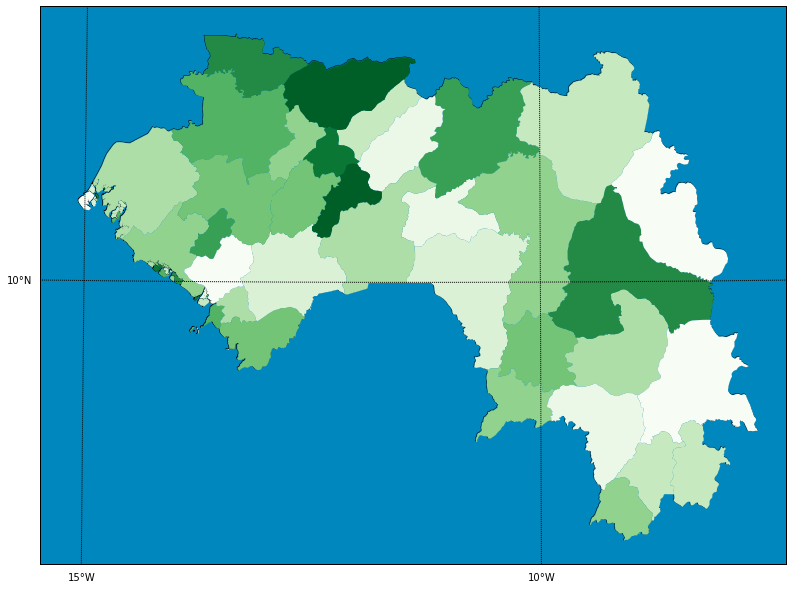

In [91]:
coords = shp.bounds
shp.close()

w, h = coords[2] - coords[0], coords[3] - coords[1]
extra = 0.05

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

m = Basemap(
    projection='tmerc', ellps='WGS84',
    lon_0=np.mean([coords[0], coords[2]]),
    lat_0=np.mean([coords[1], coords[3]]),
    llcrnrlon=coords[0] - (extra * w),
    llcrnrlat=coords[1] - (extra * h), 
    urcrnrlon=coords[2] + (extra * w),
    urcrnrlat=coords[3] + (extra * h),
    resolution='h',
    ax=ax)

m.drawmapboundary(fill_color='#0087BD')
#m.drawcountries()
#m.fillcontinents(color="#C3B091", zorder=1)


# draw lat/lon grid lines every 5 degrees.
m.drawmeridians(np.arange(0,360,5), labels=[0,0,0,1], fontsize=10, zorder=10)
m.drawparallels(np.arange(-90,90,5), labels=[1,0,0,0], fontsize=10, zorder=11)

_out = m.readshapefile(shapefilename, name='guinea', drawbounds=False)
_out = m.readshapefile('gin_adm/GIN_adm0', name='guinea_country', drawbounds=True)


num_colors = 12
cm = plt.get_cmap('Greens')
blues = [cm(1.*i/num_colors) for i in range(num_colors)]

for info, shape in zip(m.guinea_info, m.guinea):
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches, edgecolor='k', linewidths=0., zorder=3)
    pc.set_color(random.choice(blues))
    ax.add_collection(pc)

# make sure the map is drawn, needed if nothing from basemap is drawn
m.set_axes_limits(ax=ax)